Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.7124 - loss: 0.5875 - val_accuracy: 0.8767 - val_loss: 0.3660
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8971 - loss: 0.3098 - val_accuracy: 0.8848 - val_loss: 0.2986
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9196 - loss: 0.2277 - val_accuracy: 0.8665 - val_loss: 0.3252
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9302 - loss: 0.1908 - val_accuracy: 0.8889 - val_loss: 0.2804
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9460 - loss: 0.1582 - val_accuracy: 0.8728 - val_loss: 0.3248
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9508 - loss: 0.1434 - val_accuracy: 0.8816 - val_loss: 0.3026
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9587 - loss: 0.1284 - val_accuracy: 0.8781 - val_loss: 0.3225
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9639 - loss: 0.1154 - val_accuracy: 0.8764 - val_

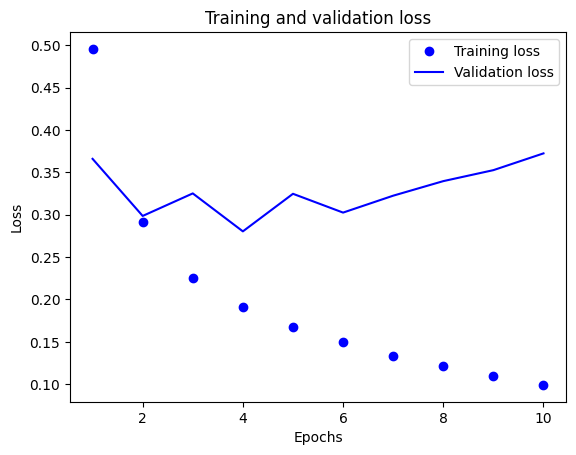

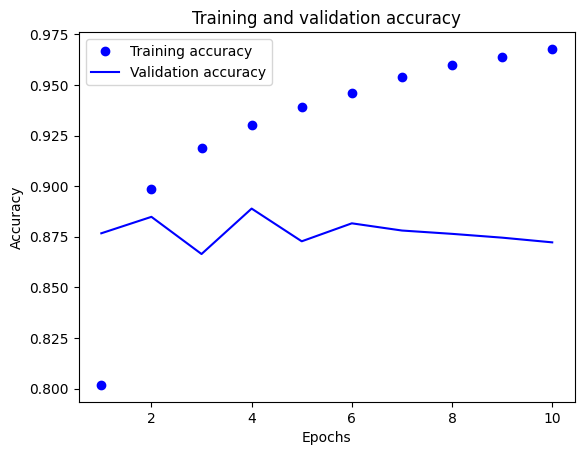

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8701 - loss: 0.3771
Test accuracy: 0.8722400069236755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Review: The movie was great!
Predicted sentiment: Neutral

Review: The movie was excelllent
Predicted sentiment: Neutral

Review: The movie was outstanding. I would like to watch again...
Predicted sentiment: Neutral

Review: The movie was terrible... total waste of money...
Predicted sentiment: Negative



In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

'''
Standardizing the input by encoding the review array into a multi-demensional vector. 
1's will be placed in the indexes of word-integers and 0's anywhere else.
NOTE: the data in the dataset already comes preprocessed so there is no need to tokenize
'''

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension), dtype=np.float32)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

train_labels = np.reshape(np.asarray(train_labels, dtype=np.float32), (len(train_data), 1))
test_labels = np.reshape(np.asarray(test_labels, dtype=np.float32), (len(test_data), 1))

''' 
Here we are creating a model, we will have 16 hidden units, we are going with a lower number to try to prevent overfitting
NOTE: if we want better accuracy we can create a validation set on data hasnt seen before,  and use it to tune parameters 
like your learning rate, or the number of layers / units in your model.
'''

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

# Train the model on the entire training data
history = model.fit(train_data, train_labels, epochs=10, batch_size=512, validation_data=(test_data, test_labels))

# Plotting training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plotting training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Testing the model on the test set
loss, accuracy = model.evaluate(test_data, test_labels)
print('Test accuracy:', accuracy)


'''  
Making sample predictions
'''

test_reviews = [
  "The movie was great!",
  "The movie was excelllent",
  "The movie was outstanding. I would like to watch again...",
  "The movie was terrible... total waste of money..."
]

# Create word_to_integer dictionary
word_to_integer = imdb.get_word_index()
word_to_integer = {k:(v+3) for k,v in word_to_integer.items()}
word_to_integer["<PAD>"] = 0
word_to_integer["<START>"] = 1
word_to_integer["<UNK>"] = 2

def preprocess_text(text):
    text = text.lower().split()
    return [word_to_integer.get(word, 2) for word in text]

# Vectorize the sequences
test_sequences = [preprocess_text(review) for review in test_reviews]
test_vectors = vectorize_sequences(test_sequences)

# Make predictions
predictions = model.predict(test_vectors)

# Define the threshold for classifying sentiment
threshold = 0.5  # Default threshold
negative_threshold = 0.4  # Threshold for negative sentiment
positive_threshold = 0.6  # Threshold for positive sentiment

# Print the predictions
for i, review in enumerate(test_reviews):
    if predictions[i][0] <= negative_threshold:
        sentiment = "Negative"
    elif predictions[i][0] >= positive_threshold:
        sentiment = "Positive"
    else:
        sentiment = "Neutral"
    print(f"Review: {review}\nPredicted sentiment: {sentiment}\n")



